# DEXA -- Data Exploration Agent 


## 1. Set up 
-  Install requirements (run once)

In [ ]:
!pip install pandas openai matplotlib seaborn python-dotenv

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import openai
from dotenv import load_dotenv

# For inline plots in notebook
%matplotlib inline  

load_dotenv()
openai.api_key = os.getenv("OPENAI_API_KEY")

## 2. Data Loading

In [7]:
df = pd.read_csv('Titanic_Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
def notebook_analyze(query):
    # Extract column names and data types
    columns = str(df.columns.tolist())
    dtypes = str(df.dtypes.to_dict())
    
    # Create structured prompt
    prompt = f"""
    You are a data analysis assistant working with a pandas DataFrame.
    Dataframe columns: {columns}
    Data types: {dtypes}
    
    The user asks: {query}
    
    Generate Python code to:
    1. Perform the requested analysis
    2. Create appropriate visualization using matplotlib/seaborn
    3. Return the plot object

    IMPORTANT:
    - Use ONLY these variables: df, plt, sns
    - Never use unsafe functions like eval() or os
    - Use seaborn (perfered) or matplotlib for plots
    
    Format your response as:
    Analysis: [Brief analysis summary]
    Code: [Python code in triple backticks]
    """
    
    # Call OpenAI API
    response = openai.ChatCompletion.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.2
    )
    response_text = response.choices[0].message.content  # Extract actual text
    display(response_text)
    return response_text

In [10]:
def execute_visualization(code_block):
    # More robust code extraction
    if '```python' in code_block:
        code = code_block.split('```python')[1].split('```')[0]
    elif '```' in code_block:
        code = code_block.split('```')[1]
    else:
        code = code_block
        
    # Add essential imports (GPT sometimes forgets them)
    full_code = f"import matplotlib.pyplot as plt\nimport seaborn as sns\n{code}"
    
    # Create safe execution environment
    local_vars = {}
    global_vars = {"df": df, "plt": plt}
    
    try:
        exec(full_code, global_vars, local_vars)
        plt.show()
    except Exception as e:
        print(f"Error executing code: {str(e)}")
        return None

"Analysis: We will first group the data by 'Pclass' and calculate the mean of 'Survived' for each class. This will give us the survival rate for each passenger class. Then, we will plot this data using a bar chart.\n\nCode:\n```python\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Assuming df is your DataFrame\ngrouped = df.groupby('Pclass')['Survived'].mean()\n\n# Create the bar plot\nplt.figure(figsize=(8,6))\nsns.barplot(x=grouped.index, y=grouped.values)\nplt.title('Survival Rate by Passenger Class')\nplt.xlabel('Passenger Class')\nplt.ylabel('Survival Rate')\nplt.show()\n```\nThis code will create a bar chart showing the survival rate for each passenger class. The x-axis represents the passenger class and the y-axis represents the survival rate. The title of the chart is 'Survival Rate by Passenger Class'."

Analysis Result:
Analysis: We will first group the data by 'Pclass' and calculate the mean of 'Survived' for each class. This will give us the survival rate for each passenger class. Then, we will plot this data using a bar chart.


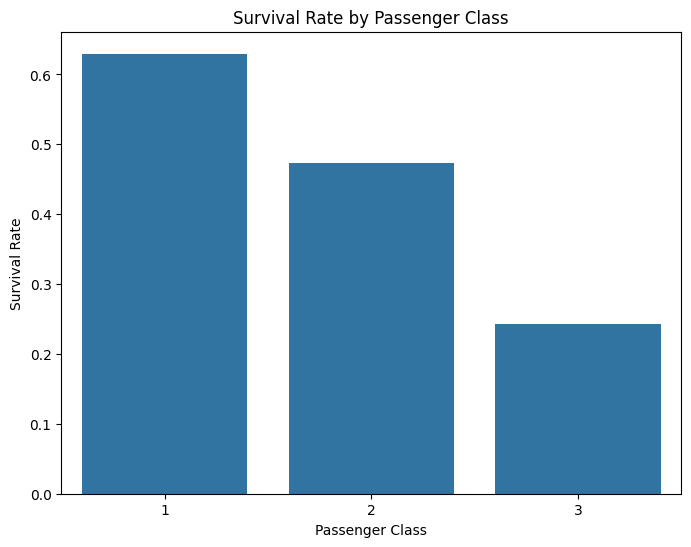

In [ ]:
# Example query
user_query = "Show the survival rate by passenger class using a bar chart"

# Get response from LLM
response = notebook_analyze(user_query)
print("Analysis Result:")
print(response.split("Code:")[0].strip())

# Extract and execute code
if "Code:" in response:
    code_section = response.split("Code:")[1].strip()
    execute_visualization(code_section)

In [18]:
# Example query
user_query = "give me a summary of this dataset"

# Get response from LLM
response = notebook_analyze(user_query)
print("Analysis Result:")
print(response.split("Code:")[0].strip())

"Analysis: This dataset contains information about Titanic passengers, including whether they survived, their class, name, sex, age, number of siblings/spouses aboard, number of parents/children aboard, ticket number, fare, cabin, and port of embarkation. A summary analysis will include basic statistics of numerical columns, distribution of categorical variables, and visualizations of survival rates based on different features.\n\nCode:\n```python\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Assuming df is already defined as the DataFrame\n\n# Summary statistics for numerical columns\nnumerical_summary = df.describe()\n\n# Distribution of categorical variables\ncategorical_summary = df.describe(include=['O'])\n\n# Plotting\nplt.figure(figsize=(15, 10))\n\n# Plot 1: Survival count\nplt.subplot(2, 2, 1)\nsns.countplot(x='Survived', data=df)\nplt.title('Survival Count')\nplt.xlabel('Survived')\nplt.ylabel('Count')\n\n# Plot 2: Survival rate by Pclass\n

Analysis Result:
Analysis: This dataset contains information about Titanic passengers, including whether they survived, their class, name, sex, age, number of siblings/spouses aboard, number of parents/children aboard, ticket number, fare, cabin, and port of embarkation. A summary analysis will include basic statistics of numerical columns, distribution of categorical variables, and visualizations of survival rates based on different features.


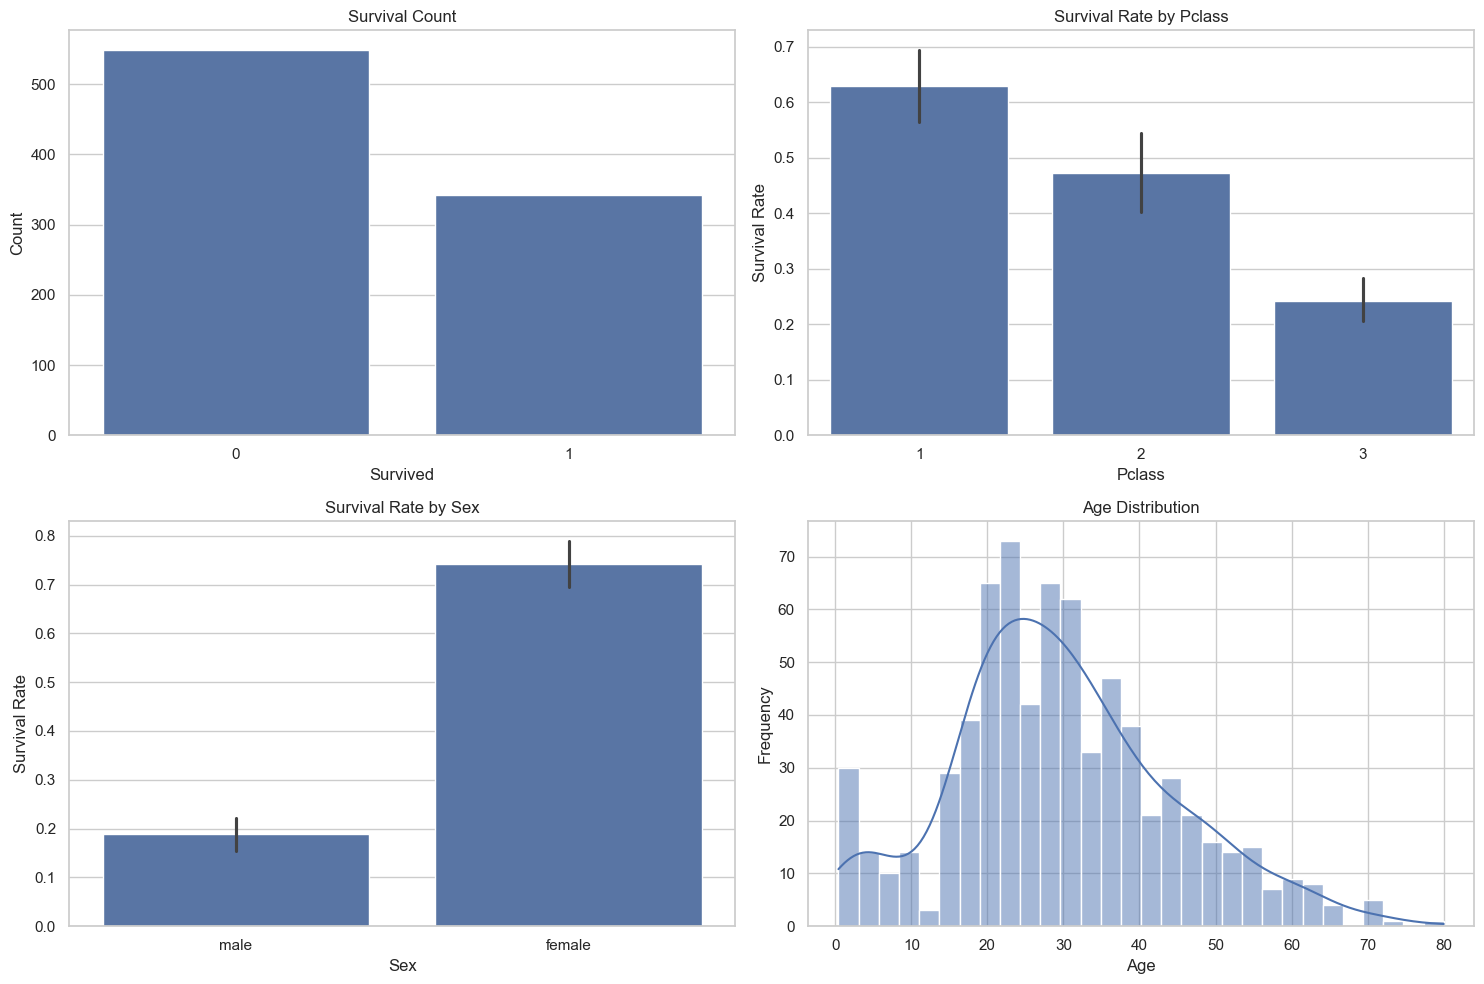

In [19]:
# Extract and execute code
if "Code:" in response:
    code_section = response.split("Code:")[1].strip()
    execute_visualization(code_section)

'Analysis: The analysis involves examining the age distribution among passengers who survived and those who did not. A stacked histogram will be used to visualize the distribution of ages for both groups, allowing for a comparison of age patterns between survivors and non-survivors.\n\nCode:\n```python\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Set the style for the plot\nsns.set(style="whitegrid")\n\n# Create a stacked histogram for age distribution among survivors and non-survivors\nplt.figure(figsize=(10, 6))\nsns.histplot(data=df, x=\'Age\', hue=\'Survived\', multiple=\'stack\', bins=30, palette=\'pastel\', kde=False)\n\n# Add titles and labels\nplt.title(\'Age Distribution Among Survivors and Non-Survivors\')\nplt.xlabel(\'Age\')\nplt.ylabel(\'Count\')\n\n# Show the plot\nplt.show()\n```'

Analysis Result:
Analysis: The analysis involves examining the age distribution among passengers who survived and those who did not. A stacked histogram will be used to visualize the distribution of ages for both groups, allowing for a comparison of age patterns between survivors and non-survivors.


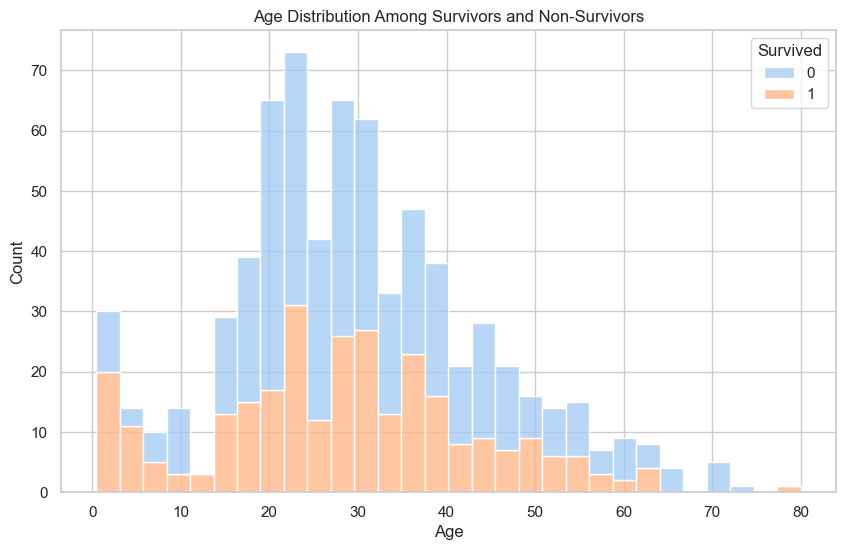

In [17]:


# Example query
user_query = "Explore age distribution among survivors and non-survivors (stacked histogram)"

# Get response from LLM
response = notebook_analyze(user_query)
print("Analysis Result:")
print(response.split("Code:")[0].strip())

# Extract and execute code
if "Code:" in response:
    code_section = response.split("Code:")[1].strip()
    execute_visualization(code_section)